extracellular recording from V1 of B6 mouse during visual stimulation with drifting gratings (131 neurons recorded during 1200 trials)

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [3]:
import pickle

from isoCycle import cycleDetection

## Load the Spike Times

Loading the spike times in a one dimensional numpy array, times in seconds

In [4]:
with open('spikeTimes.pkl','rb') as f:
        V1allSpikesTimes = pickle.load(f)

In [5]:
V1allSpikesTimes.shape

(2852126,)

running the decoder to extract the gamma cycles

In [12]:
cycleDetection(V1allSpikesTimes, cycleDetectionDur=100)

4002/4002 [==============================] - 16s 4ms/step
4925 gamma cycles detected during 100 seconds in V1



### Importing Modules 

In [4]:
# the basic modules that are used throught the notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import copy

import pickle
import scipy.io as sio

from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages

### Importing functions

In [6]:
#the functions are imported from the folders in the same directory as the notebook
from intanRead.IntanRaw_read_data import IntanRaw_read_data

import basicFunctions.misc as misc

import basicFunctions.readIntanPorts as readIntan
import basicFunctions.preprocess as preprocess
import basicFunctions.LFP as LFP
import basicFunctions.spike as spike
import basicFunctions.state as state

%matplotlib widget
from ipywidgets import *
plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

## Loading the spike times

In [7]:
# When you run this cell a diolog box will pop up to select the data file
dataFileAdd, dataFileBaseFolder = preprocess.loadFilePath(defaultDataDir)
infoFileAdd = dataFileBaseFolder + '/info.rhd'

# create figure folder
figFolder = dataFileBaseFolder+'\OutputFigures\\'
if not(os.path.exists(figFolder)):
    os.mkdir(figFolder)

### running the decoder

Here I run the gamma detection and will examin the timing of the gamma cycles after the stimulus onset to see if I could aligne the trials based on the time that the information gets to the V1

In [16]:
clusterNumbers = np.concatenate((SUA_clusters,MUA_clusters))
allValidSpikes = []

for clusterCounter in range(len(clusterNumbers)):
    clusterNo = clusterNumbers[clusterCounter]
    
    clusterSpikeTimes = spikesTime[np.where(spikeClusters==clusterNo)]
    
    allValidSpikes.append(clusterSpikeTimes)
    
V1allSpikesTimes = np.sort(np.concatenate(allValidSpikes)).squeeze()

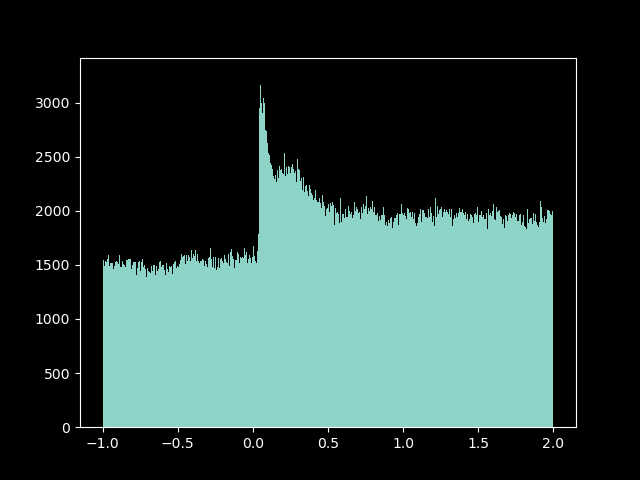

In [17]:
plt.figure()
plt.hist(np.concatenate(spike.eventTriggeredSpikingSingleCluster(spikesTime=V1allSpikesTimes,eventsTime=stimStartTime,\
                            responseWindowEnd=2,responseWindowStart=1)),bins=1000);

## loading the decoder and setting the params

In [1]:
from basicFunctions import  populationDecoder

6249/6249 [==============================] - 26s 4ms/step
[[4.25595797e-01 9.92681554e-01 5.00000000e-03]
 [2.68718334e-01 9.91930944e-01 1.00000000e-02]
 [2.27059486e-01 9.91367986e-01 1.50000000e-02]
 [1.97973353e-01 9.90617377e-01 2.00000000e-02]
 [1.70013136e-01 9.88553199e-01 2.50000000e-02]
 [1.51060236e-01 9.86113717e-01 3.00000000e-02]
 [1.33420904e-01 9.84049540e-01 3.50000000e-02]
 [1.18408707e-01 9.81797711e-01 4.00000000e-02]
 [1.06586602e-01 9.77857009e-01 4.50000000e-02]
 [9.45768437e-02 9.72790392e-01 5.00000000e-02]
 [8.29423907e-02 9.65847251e-01 5.50000000e-02]
 [7.16832426e-02 9.59467067e-01 6.00000000e-02]
 [6.36141865e-02 9.54025145e-01 6.50000000e-02]
 [5.70463502e-02 9.45956089e-01 7.00000000e-02]
 [5.02908613e-02 9.37887033e-01 7.50000000e-02]
 [4.35353725e-02 9.27753800e-01 8.00000000e-02]
 [3.88440608e-02 9.17808219e-01 8.50000000e-02]
 [3.50910114e-02 9.09176206e-01 9.00000000e-02]
 [3.17132670e-02 8.97917058e-01 9.50000000e-02]
 [2.81478701e-02 8.85531995e-0

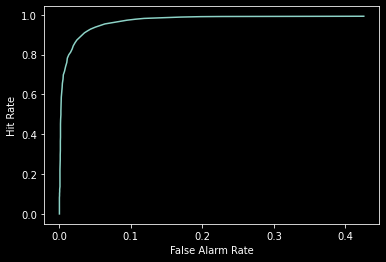

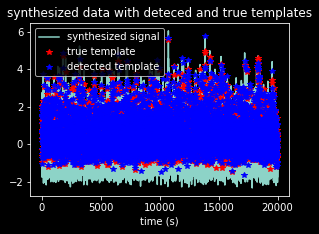

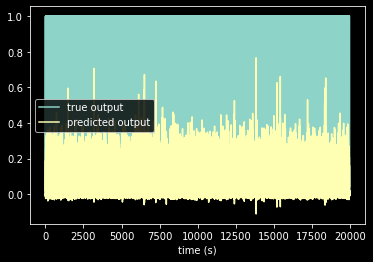

In [2]:
# loading the general model
modelAdd = \
        'Z:/Dropbox (EinsteinMed)/WorkSpaces/VIP-Inhibition/trainedDecoders/general/'\
            'lstmDigitalOutput_generalTemplate_10000s_5_percentNoise_20_WidthJitter_[200, 200]_lstmUnits_'\
            'bothsideHistory2022-06-28.pkl'

#loading the general model and its paramters trained to decode 3-s template while include [0.75, 1.5, 3, 6, 12, 24] templates
loadedModel_general_template, dt_general_3s_template,\
    binsBefore_general_template, binsAfter_general_template,\
        exitabilityTemplates_general_gaussian,\
            templateNo_general_gaussian, templatesProbVec_general_gaussian,\
                templatesHeights_general_gaussian, templatesWidths_general_gaussian,\
                    chosenDetectionThreshold = \
                        populationDecoder.loadModel(modelAdd=modelAdd)

cyclesVec = ['gamma']
cycles_nVec = [-7]

In [18]:
regionsVec = np.array(['V1'])
regionsDataTypeVec = np.array(['spikeTime'])

# putting the data from all regions in one vectro to feed it into the functions
allRegionsData = [V1allSpikesTimes]

In [19]:
n = -7
cycleName = 'gamma'
defaultHistBin = 0

252336/252336 [==============================] - 983s 4ms/step
Number of detected gamma cycles in V1: 256447



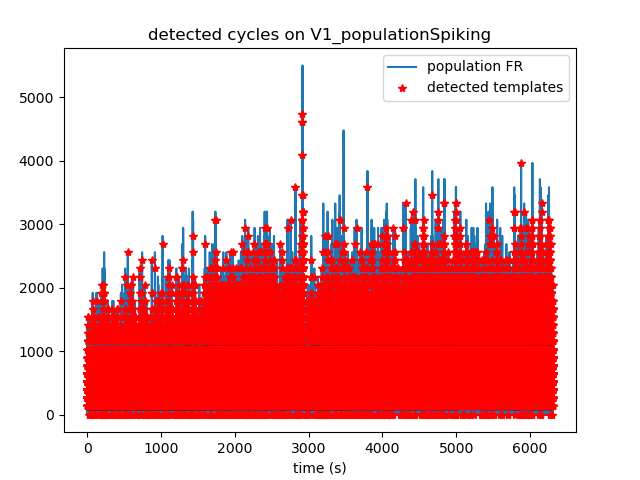

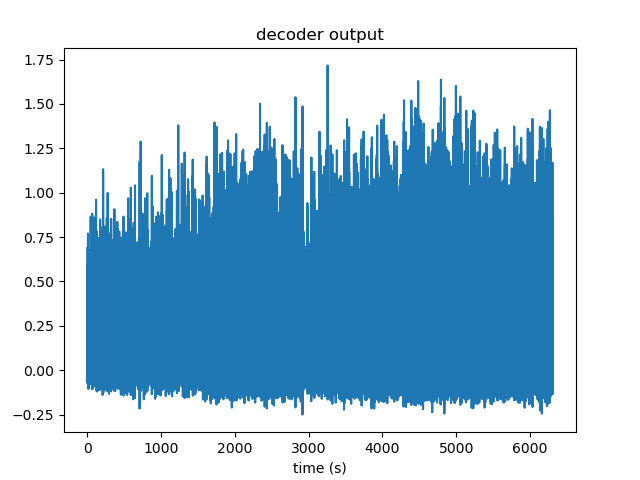

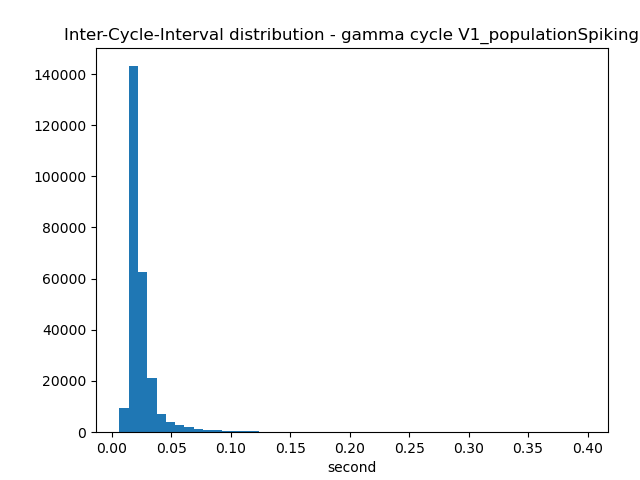

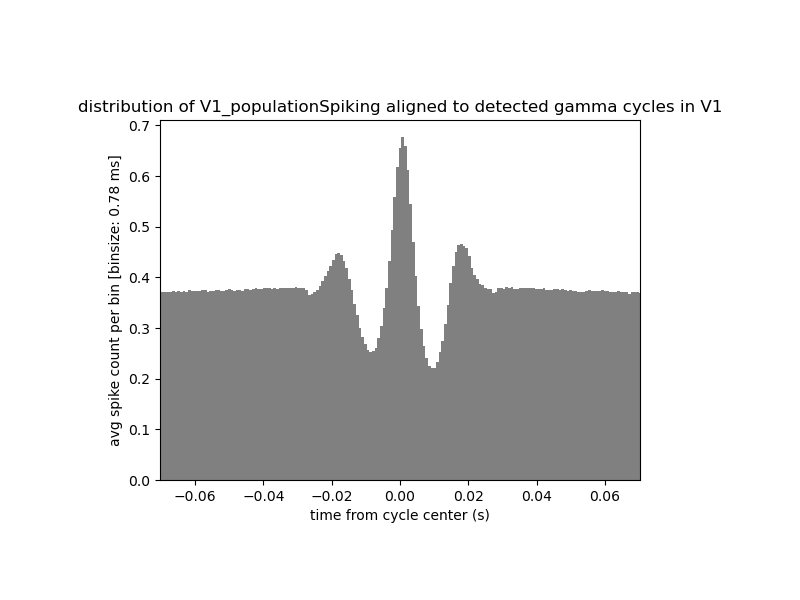

In [20]:
plt.style.use('default')
templateDetectedTimes_V1, triggeredActivityInAllregionsByDetectedCycles_V1, timePointsAllregions =\
    populationDecoder.applyGeneralDecoder(inputAllRegions=allRegionsData, regionName='V1',\
        n=n, cycleName=cycleName, regionVec=regionsVec, regionsDataTypeVec=regionsDataTypeVec,\
            loadedModel_general_template=loadedModel_general_template,\
              dt_general_3s_template=dt_general_3s_template,\
                  binsAfter_general_template=binsAfter_general_template,\
                      binsBefore_general_template=binsBefore_general_template,\
                          detectionThreshold=chosenDetectionThreshold,\
                              showFigs=True, saveFigs=True, interCycleIntervalFig=True,\
                                  sessionName=sessionName, continuousInputSampingRate=cameraAvgFrameRate,\
                                         histBinWidth=defaultHistBin, wholeSession=True, maxNumberForDeteced=2000)

## the relative timing of stimulus onset and gamma cycles

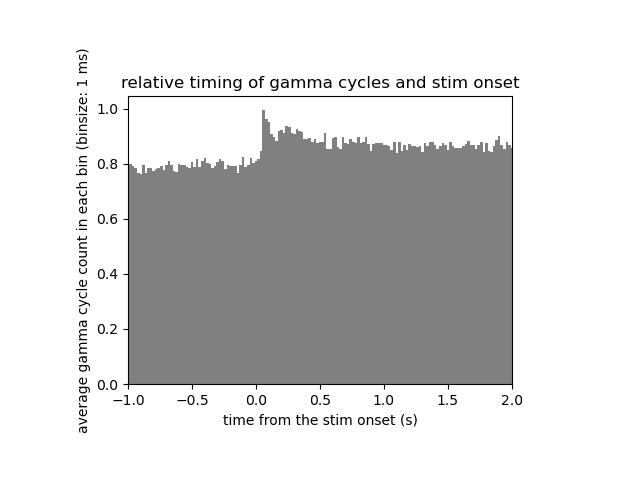

In [29]:
gamma_rel2_stim = spike.eventTriggeredSpikingSingleCluster(\
                             spikesTime=templateDetectedTimes_V1, eventsTime=stimStartTime,\
                                        responseWindowStart=1,responseWindowEnd=2)

cyclesNo = len(gamma_rel2_stim)

gamma_rel2_stim = np.concatenate(gamma_rel2_stim)

fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.6,0.6])
binsize = 0.02

windowToZoomStart = -1
windowToZoomEnd = 2

windowLen = windowToZoomEnd - windowToZoomStart

binsNo = int(windowLen/binsize)

dataToPlot = gamma_rel2_stim[(gamma_rel2_stim>windowToZoomStart) & \
                                         (gamma_rel2_stim<windowToZoomEnd)]

counts, bins = np.histogram(dataToPlot,bins=binsNo,\
                                normed=False)

plt.hist(bins[:-1], bins, weights=counts*np.ones(len(counts))/cyclesNo,\
            align='right',color='grey')

ax.set_xlabel('time from the stim onset (s)')

ax.set_ylabel('average gamma cycle count in each bin (binsize: 1 ms)')

ax.set_title('relative timing of gamma cycles and stim onset')


ax.set_xbound(-1,2)

#### align the trials based on the first gamma cycle following the arrival of the info to V1

In [33]:
V1responseDelay = 0.06
delayToFirstCycle = []

for trialCounter in range(len(stimStartTime)):
    
    stimOnsetTime = stimStartTime[trialCounter]
    V1_stimInfoTime = stimOnsetTime + V1responseDelay
    
    stimGammaCycleTime = templateDetectedTimes_V1[np.where(templateDetectedTimes_V1>V1_stimInfoTime)[0][0]] - stimOnsetTime
    
    delayToFirstCycle.append(stimGammaCycleTime)

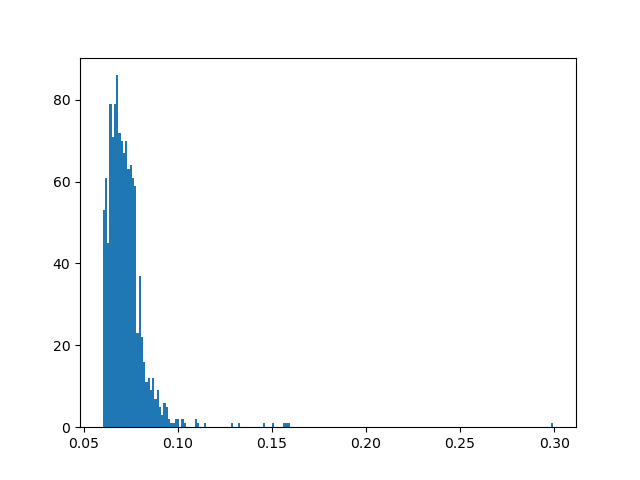

In [37]:
plt.figure()
plt.hist(delayToFirstCycle,bins=200);

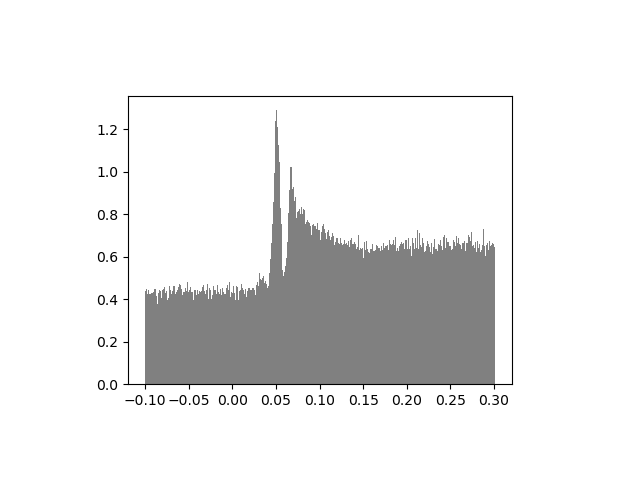

In [58]:
V1responseDelay = 0.05
delayToFirstCycle = []

for trialCounter in range(len(stimStartTime)):
    
    stimOnsetTime = stimStartTime[trialCounter]
    V1_stimInfoTime = stimOnsetTime + V1responseDelay
    
    # the first gamma cycle after the assumed delay
#     stimGammaCycleTime = templateDetectedTimes_V1[np.where(templateDetectedTimes_V1>V1_stimInfoTime)[0][0]] - stimOnsetTime
    
#     the closest gamma cycle to the assumed delay
    stimGammaCycleTime = templateDetectedTimes_V1[np.argmin(np.abs(templateDetectedTimes_V1 - V1_stimInfoTime))] - stimOnsetTime
    
    delayToFirstCycle.append(stimGammaCycleTime)


realignedStimOnset = stimStartTime + delayToFirstCycle - V1responseDelay

realignedResponse = np.concatenate(spike.eventTriggeredSpikingSingleCluster(spikesTime=V1allSpikesTimes,eventsTime=realignedStimOnset,\
                            responseWindowEnd=0.3,responseWindowStart=0.1))

fig = plt.figure()
ax = fig.add_axes([0.2,0.2,0.6,0.6])
binsize = 0.001

windowToZoomStart = -0.1
windowToZoomEnd = 0.3

windowLen = windowToZoomEnd - windowToZoomStart

binsNo = int(windowLen/binsize)

dataToPlot = realignedResponse[(realignedResponse>windowToZoomStart) & \
                                         (realignedResponse<windowToZoomEnd)]

counts, bins = np.histogram(dataToPlot,bins=binsNo,\
                                normed=False)

plt.hist(bins[:-1], bins, weights=counts*np.ones(len(counts))/cyclesNo,\
            align='right',color='grey');

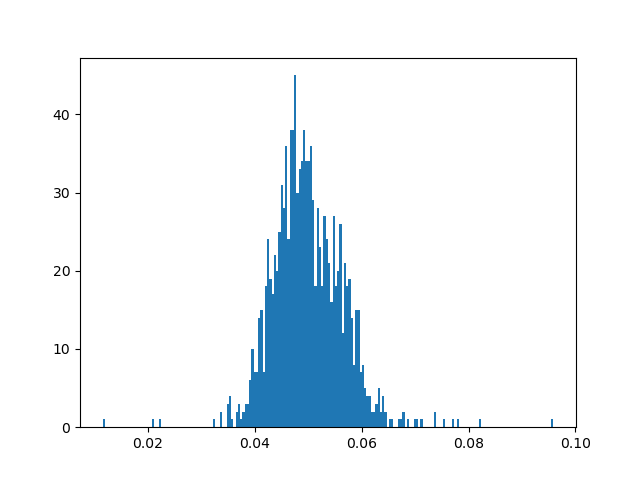

In [56]:
plt.figure()
plt.hist(delayToFirstCycle,bins=200);

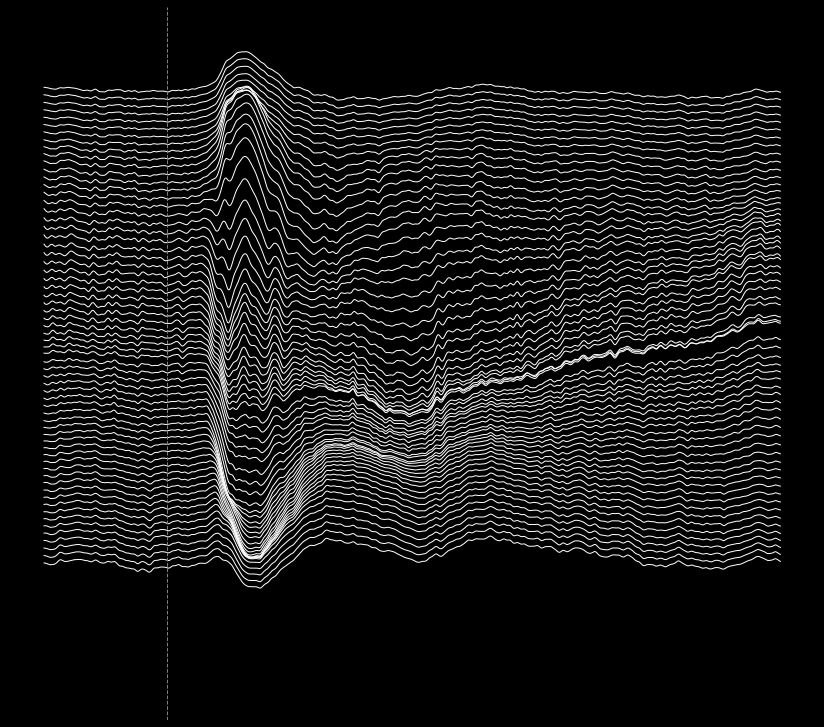

In [59]:
%matplotlib inline
plt.style.use('dark_background')

windowLengthBefore = 0.1
windowLengthAfter = 0.5
LFP.triggeredAverageAllChannels([],stimStartTime,windowLengthBefore,windowLengthAfter,
            dataFileBaseFolder=dataFileBaseFolder,LFP_plotRowDistance = 40,zscore=False,symmetricalXaxisMS=False);

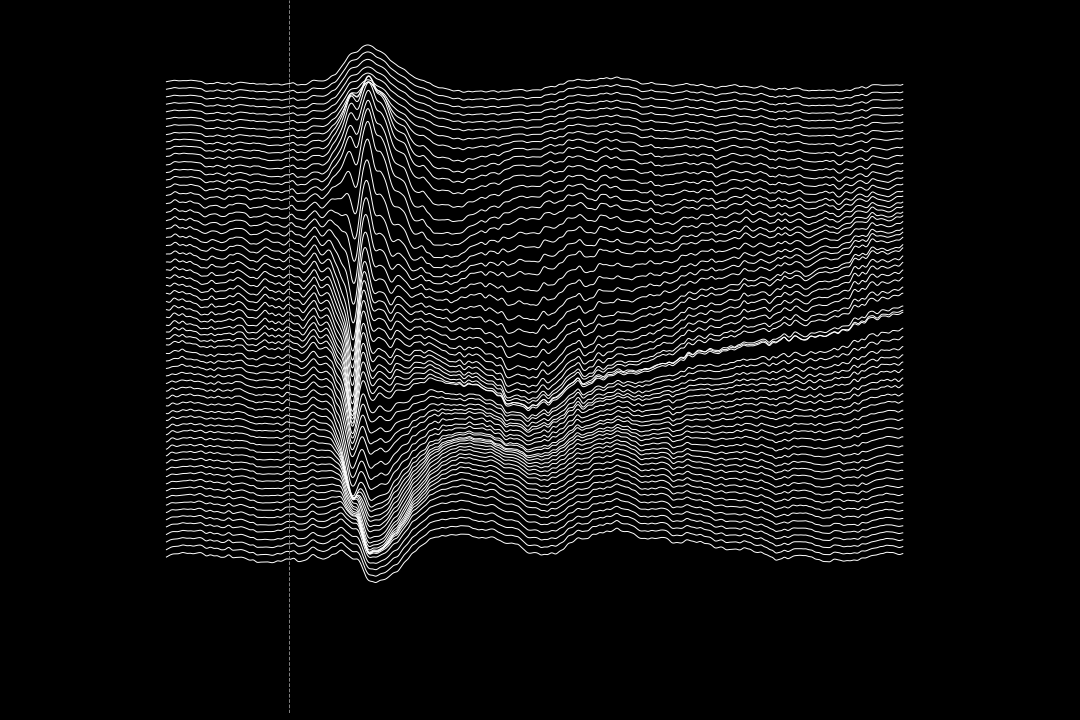

In [61]:
%matplotlib widget
plt.style.use('dark_background')

windowLengthBefore = 0.1
windowLengthAfter = 0.5
LFP.triggeredAverageAllChannels([],realignedStimOnset,windowLengthBefore,windowLengthAfter,
            dataFileBaseFolder=dataFileBaseFolder,LFP_plotRowDistance = 40,zscore=False,symmetricalXaxisMS=False);